In [ ]:

!pip install -U -q PyDrive
!pip install -U -q wordcloud
!pip install -U -q bokeh
!pip install textblob
!pip install sklearn

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from bs4 import BeautifulSoup

from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
from wordcloud import WordCloud
from scipy.stats import hmean
from scipy.stats import norm
from pylab import *


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from time import time

  

     |████████████████████████████████| 366 kB 25.5 MB/s 
     |████████████████████████████████| 18.5 MB 8.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df_train = pd.read_csv('Dataset_For_Project/timesofindia_final.csv',usecols = [2,4], encoding='latin-1')
df_train

,text,Sentiment
0,MP to study new Motor Act before implementing ...,Negative
1,Bhujbal says higher power rate driving industr...,Negative
2,Mandira Bedi shares a monochrome picture in a ...,Negative
3,Harassment in office: DM seeks action-taken re...,Negative
4,Two students end their lives,Negative
...,...,...
63075,Going to India Gate tonight? You could be in f...,Positive
63076,40;000 cops to ensure safe New Year celebratio...,Positive
63077,Ten more private trains from Mumbai on cards,Positive
63078,A trip to a tribal village with super cop Vija...,Positive


In [ ]:
#Stripping any emojis available
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :'),:D, : D, =)
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))|:\s?D | =\)', '', tweet)
    # Sad -- :-(, : (, :(, ):, )-: , :p
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)|:p', '', tweet)
    return tweet
  

In [ ]:
#Cleaning data- preprocessing steps
url = re.compile(r"(?:(http[s]?://\S+)|((//)?(\w+\.)?\w+\.\w+/\S+))")
user_mention = re.compile(r"(?:(?<!\w)@\w+\b)")
number = re.compile(r"(?:\b\d+\b)")
repeated_char = '([a-zA-Z])\\1+'
length_repeated_char = '\\1\\1'

def clean(raw):
  #converting HTML encoding to text
  new_row = BeautifulSoup(raw, 'html.parser').get_text()
  
  #Changing all text to lower case
  new_row = new_row.lower()
  
  #Replacing any url with class URL
  new_row = re.sub(url, '', new_row)
  
  #replacing any @username with class USERNAME
  new_row = re.sub(user_mention, '', new_row)
  
  #Stripping repeated chars
  new_row = re.sub(repeated_char, length_repeated_char, new_row)
  
  #Replacing #hashtag with hashtag
  new_row = re.sub(r'#(\S+)', r' \1 ', new_row)
  
  #Removing numbers
  new_row = re.sub(number, '', new_row)
  
  #decoding text with 'utf-8-sig'
  try:
    temp_row = new_row.decode("utf-8-sig").replace(u"\ufffd", "?")     
  except:
    temp_row = new_row
  
  #Removing emojis
  new_row = handle_emojis(temp_row);
  
  return new_row

In [ ]:
#clean_tweets_news = []   


In [ ]:
#data preprocessing

#chunks_range = [0,15000,30000,45000,63080] 
#for i in range(chunks_range[3],chunks_range[4]):   #repeat for all range i.e. 0-1, 1-2, 2-3, 3-4
  #clean_tweets_news.append(clean(df_train['text'][i]))

In [ ]:
#len(clean_tweets_news)

63080

In [ ]:
#save to csv file
#clean_df = pd.DataFrame(clean_tweets_news, columns=['text'])
#clean_df['target'] = df_train.Sentiment



In [ ]:
#clean_df.to_csv('Dataset_For_Project/clean_timesofindia.csv',encoding='utf-8')


In [ ]:
df_clean = pd.read_csv('Dataset_For_Project/clean_timesofindia.csv', usecols = [1,2], encoding='latin-1')
df_clean.head()

,text,target
0,mp to study new motor act before implementing ...,Negative
1,bhujbal says higher power rate driving industr...,Negative
2,mandira bedi shares a monochrome picture in a ...,Negative
3,harassment in office: dm seeks action-taken re...,Negative
4,two students end their lives,Negative


In [ ]:
df_clean.shape

(63080, 2)

In [ ]:
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

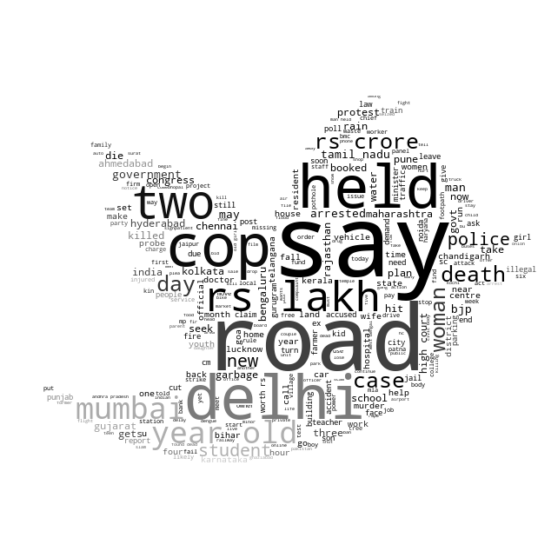

In [ ]:
# Visualizing negative tweets using word cloud
neg_tweets = df_clean[df_clean.target == "Negative"]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

stopwords=set(STOPWORDS)
more_stopwords= {'will', 'want'}
stopwords= stopwords.union(more_stopwords)

mask_image= np.array(Image.open('images/twitter_mask.jpg'))
wordcloud = WordCloud(background_color='white', max_words=2000, mask=mask_image, stopwords=stopwords).generate(neg_string)

fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(10)
image_colors= ImageColorGenerator(mask_image)
wordcloud.recolor(color_func=image_colors)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file('images/neg_tweets_cloud.png')


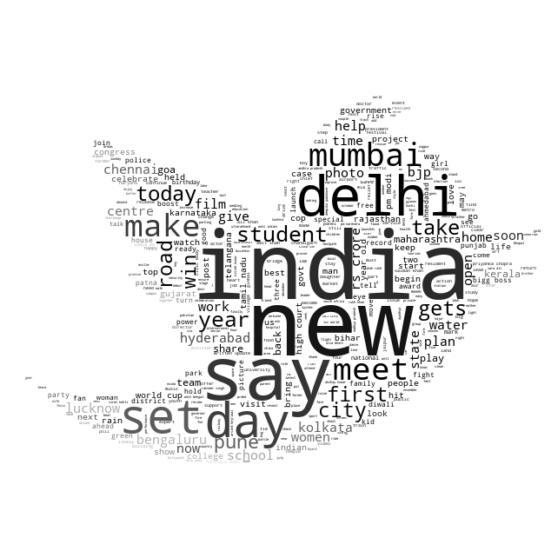

In [ ]:
# Visualizing positive tweets in a word cloud format
pos_tweets = df_clean[df_clean.target == "Positive"]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
    
pos_string = pd.Series(pos_string).str.cat(sep=' ')

stopwords=set(STOPWORDS)
more_stopwords= {'will', 'want', 'im', 'u', 's', 'die', 'amp', 'one'}
stopwords= stopwords.union(more_stopwords)

mask_image= np.array(Image.open('images/twitter_mask.jpg'))
wordcloud = WordCloud(background_color='white', max_words=2000, mask=mask_image, stopwords=stopwords).generate(pos_string)

fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(10)
image_colors= ImageColorGenerator(mask_image)
wordcloud.recolor(color_func=image_colors)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file('images/positive_tweets_cloud.png')

In [ ]:
# Using CountVectorizer library to analyze frequency of words in tweets
cvec = CountVectorizer()
cvec.fit(df_clean.text)

len(cvec.get_feature_names()) # outputs total number of words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


36906

In [ ]:
# Building term frequency table to observe the most frequent words in the dataset, notice that all of them are stop words.
neg_doc_matrix = cvec.transform(df_clean[df_clean.target == "Negative"].text)
pos_doc_matrix = cvec.transform(df_clean[df_clean.target == "Positive"].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,negative,positive,total
to,8681,10686,19367
in,9130,8407,17537
for,5748,4672,10420
of,4425,4684,9109
on,3546,3627,7173
the,1182,3621,4803
at,2020,1965,3985
and,1225,2730,3955
with,1251,2238,3489
from,1521,1579,3100


Text(0.5, 1.0, 'Top 500 tokens in tweets')

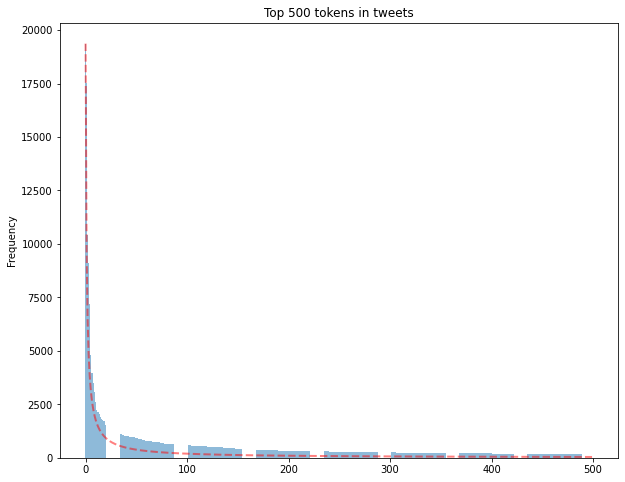

In [ ]:
# Plotting tokens' frequency to see if they follow zipf's law( which states that the frequecy of the rth word => f(r) is directly prop with 1 / r)
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

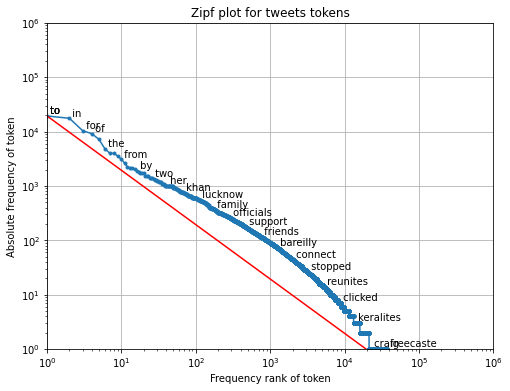

In [ ]:
# Using a log-log graph, like the last one, near zipfian should be a straight line, we notice in more frequent words, their freq is above expected zipfian, and less freuent is below near zipfian
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [ ]:
# Now we want to see what are the most frequent words in positive and negative tweets seperately.
cvec = CountVectorizer(stop_words='english',max_features=1000) # Removing stop words this time and limiting studied words to 10k
cvec.fit(df_clean.text)
document_matrix = cvec.transform(df_clean.text)


In [ ]:
df_clean[df_clean.target == "Positive"]

,text,target
31540,natasha is my rock; the stabilising factor in ...,Positive
31541,get some scents,Positive
31542,good sunglasses are a must-have,Positive
31543,mineral magic and its effect on coat condition,Positive
31544,weekly books news ( may- june),Positive
...,...,...
63075,going to india gate tonight? you could be in f...,Positive
63076,; cops to ensure safe new year celebrations in...,Positive
63077,ten more private trains from mumbai on cards,Positive
63078,a trip to a tribal village with super cop vija...,Positive


In [ ]:
# Processing negative tweets
%%time
neg_batches = np.linspace(0,11594,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

1288 entries' term freuquency calculated
2576 entries' term freuquency calculated
3864 entries' term freuquency calculated
5152 entries' term freuquency calculated
6441 entries' term freuquency calculated
7729 entries' term freuquency calculated
9017 entries' term freuquency calculated
10305 entries' term freuquency calculated
11594 entries' term freuquency calculated
CPU times: user 37.4 ms, sys: 4.12 ms, total: 41.6 ms
Wall time: 39.6 ms


In [ ]:
# Processing positive tweets
%%time
pos_batches = np.linspace(11595,24082,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

12982 entries' term freuquency calculated
14369 entries' term freuquency calculated
15757 entries' term freuquency calculated
17144 entries' term freuquency calculated
18532 entries' term freuquency calculated
19919 entries' term freuquency calculated
21307 entries' term freuquency calculated
22694 entries' term freuquency calculated
24082 entries' term freuquency calculated
CPU times: user 39.5 ms, sys: 9.23 ms, total: 48.7 ms
Wall time: 47.8 ms


In [ ]:
# Displaying the top frequent words(non-stop) in both positive and negative tweets
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,negative,positive,total
rs,624,660,1284
man,427,478,905
held,418,452,870
delhi,391,463,854
year,337,352,689
road,316,314,630
government,296,321,617
woman,275,315,590
lakh,267,321,588
old,284,292,576


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

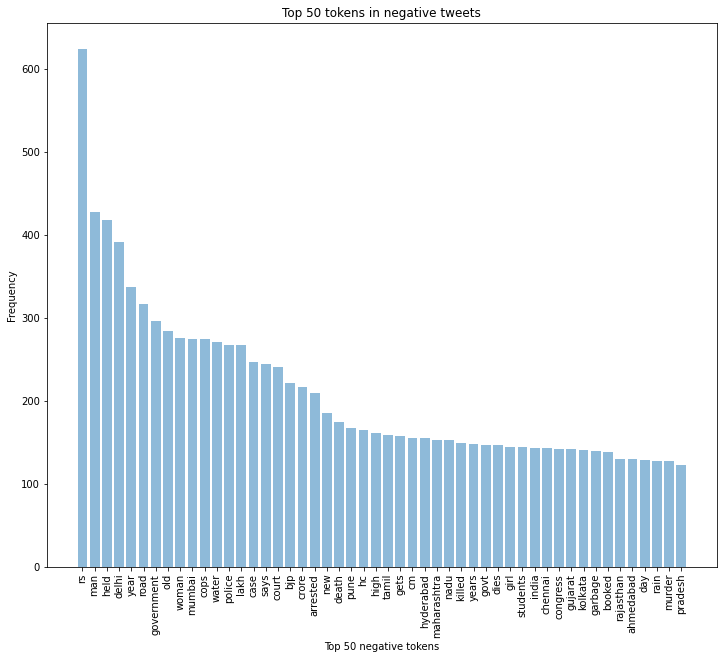

In [ ]:
# Displaying most common words in negative tweets
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')



Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

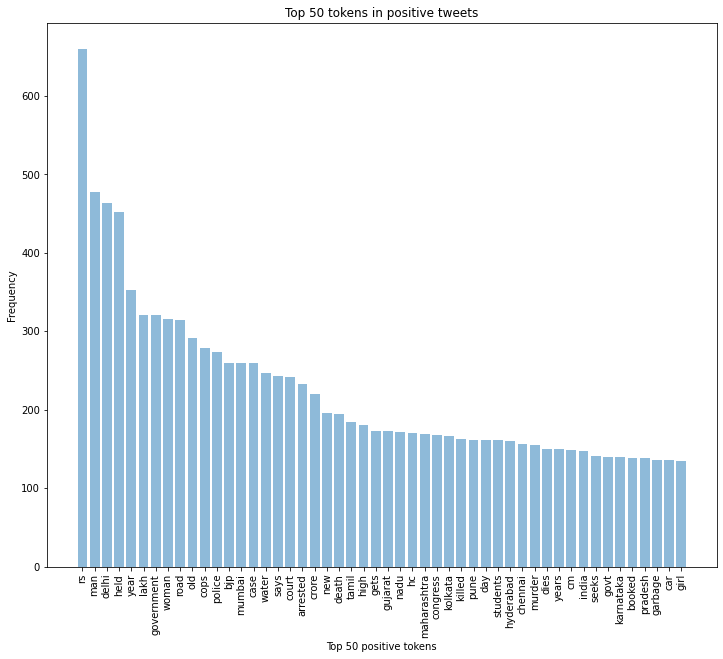

In [ ]:
# Displaying most common words in positive tweets
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

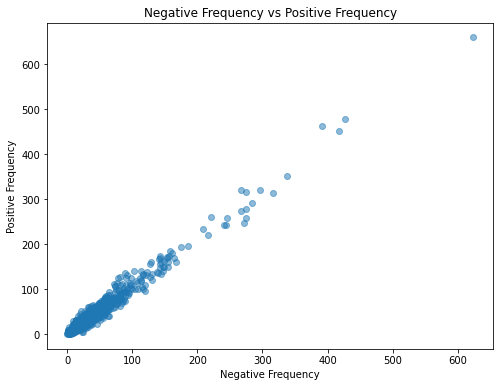

In [ ]:
# We noticed in the above many neutral words occuring in both classes, let's plot the negative frequency of a word on X-axis, and the positive frequency on Y-axis
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [ ]:
# As we can't infer much meaning from the previous plots, let's define a pos_rate and neg_rate, to indicate the rate of freq of a word in a certain class vs the other class
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
celebrates,0,1,1,1.000000
sara,0,2,2,1.000000
happy,1,9,10,0.900000
grand,1,8,9,0.888889
aaryan,1,7,8,0.875000
friendly,1,6,7,0.857143
reveals,3,15,18,0.833333
st,9,28,37,0.756757
success,1,3,4,0.750000
celebs,3,9,12,0.750000


In [ ]:
# Now let's define a freq_pct representing the rate by which a word occurs in a certain class only
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
rs,624,660,1284,0.514019,0.015293
man,427,478,905,0.528177,0.011076
delhi,391,463,854,0.542155,0.010729
held,418,452,870,0.519540,0.010474
year,337,352,689,0.510885,0.008156
lakh,267,321,588,0.545918,0.007438
government,296,321,617,0.520259,0.007438
woman,275,315,590,0.533898,0.007299
road,316,314,630,0.498413,0.007276
old,284,292,576,0.506944,0.006766


In [ ]:
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)               
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
rs,624,660,1284,0.514019,0.015293,0.029703
man,427,478,905,0.528177,0.011076,0.021697
delhi,391,463,854,0.542155,0.010729,0.021041
held,418,452,870,0.519540,0.010474,0.020533
year,337,352,689,0.510885,0.008156,0.016057
lakh,267,321,588,0.545918,0.007438,0.014676
government,296,321,617,0.520259,0.007438,0.014667
woman,275,315,590,0.533898,0.007299,0.014401
road,316,314,630,0.498413,0.007276,0.014342
old,284,292,576,0.506944,0.006766,0.013354


In [ ]:
#for positive words
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])

term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])

term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])

term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
protest,78,125,203,0.615764,0.002896,0.005766,0.852903,0.934129,0.891670
car,89,136,225,0.604444,0.003151,0.006270,0.822501,0.956353,0.884391
hit,81,126,207,0.608696,0.002920,0.005811,0.834355,0.936455,0.882462
women,72,112,184,0.608696,0.002595,0.005168,0.834355,0.897575,0.864811
bus,92,131,223,0.587444,0.003035,0.006040,0.769941,0.947143,0.849399
pay,77,113,190,0.594737,0.002618,0.005214,0.793483,0.900826,0.843754
karnataka,102,140,242,0.578512,0.003244,0.006452,0.739169,0.962748,0.836273
check,73,107,180,0.594444,0.002479,0.004938,0.792568,0.880157,0.834069
life,74,107,181,0.591160,0.002479,0.004938,0.782121,0.880157,0.828248
probe,90,124,214,0.579439,0.002873,0.005718,0.742458,0.931736,0.826398


In [ ]:
#For Negative words
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']

term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()

term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])

term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])

term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])

term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
cases,119,95,214,0.443925,0.002201,0.004381,0.202151,0.830154,0.325130,0.556075,0.003008,0.005984,0.797849,0.942543,0.864181
goa,116,100,216,0.462963,0.002317,0.004611,0.265869,0.852417,0.405319,0.537037,0.002932,0.005833,0.734131,0.935360,0.822618
soon,81,62,143,0.433566,0.001437,0.002864,0.171700,0.635718,0.270375,0.566434,0.002047,0.004080,0.828300,0.794566,0.811082
water,271,247,518,0.476834,0.005723,0.011311,0.317978,0.999913,0.482513,0.523166,0.006850,0.013523,0.682022,0.999998,0.810954
illegal,120,109,229,0.475983,0.002526,0.005025,0.314658,0.887359,0.464576,0.524017,0.003033,0.006032,0.685342,0.944793,0.794421
residents,88,74,162,0.456790,0.001715,0.003417,0.244157,0.714994,0.364011,0.543210,0.002224,0.004431,0.755843,0.831795,0.792002
girl,144,134,278,0.482014,0.003105,0.006170,0.338487,0.952838,0.499523,0.517986,0.003640,0.007229,0.661513,0.980896,0.790151
stop,64,41,105,0.390476,0.000950,0.001895,0.077857,0.484164,0.134143,0.609524,0.001618,0.003227,0.922143,0.686161,0.786839
railway,84,70,154,0.454545,0.001622,0.003233,0.236505,0.689477,0.352199,0.545455,0.002123,0.004230,0.763495,0.811085,0.786571
supply,63,39,102,0.382353,0.000904,0.001803,0.065695,0.469495,0.115262,0.617647,0.001592,0.003177,0.934305,0.679089,0.786511


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

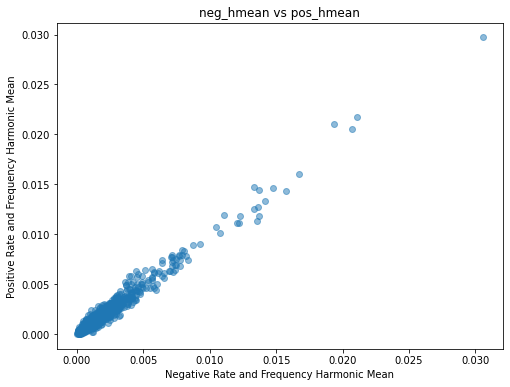

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

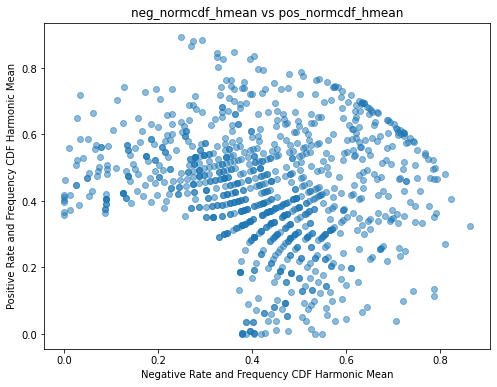

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [ ]:
x = df_clean.text
y = df_clean.target

SEED = 2000

#split clean data to two sets : training , validation and test
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
#split the second set into two other sets : validation , test 
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)


print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == "Negative"]) / (len(x_train)*1.))*100,(len(x_train[y_train == "Positive"]) / (len(x_train)*1.))*100))

print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == "Negative"]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == "Positive"]) / (len(x_validation)*1.))*100))

print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == "Negative"]) / (len(x_test)*1.))*100,(len(x_test[y_test == "Positive"]) / (len(x_test)*1.))*100))




Train set has total 50464 entries with 50.11% negative, 49.89% positive
Validation set has total 6308 entries with 49.05% negative, 50.95% positive
Test set has total 6308 entries with 50.11% negative, 49.89% positive


In [ ]:
print(y_validation)

26510    Negative
50389    Positive
1223     Negative
32283    Positive
38902    Positive
           ...   
18767    Negative
8017     Negative
31753    Positive
58369    Positive
60592    Positive
Name: target, Length: 6308, dtype: object


In [ ]:
#calculate accuracy for any classifer using {"null accuracy"} and get total time for training and testing
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time


In [ ]:
def nfeature_accuracy_checker(vectorizer=None, n_features=None, stop_words=None, ngram_range=(1, 1), classifier=None):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [ ]:
#calculate accuracy for any classifer using {"null accuracy"} and get total time for training and testing
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == "Negative"]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == "Negative"]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == "Negative"]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time


In [ ]:
# Using count vectorizer to extract features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,30001,2000)


# Unigrams without stop words
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words='english', classifier=lr)


RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression()


Validation result for 2000 features
null accuracy: 50.95%
accuracy score: 76.47%
model is 25.52% more accurate than null accuracy
train and test time: 1.52s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.95%
accuracy score: 79.23%
model is 28.28% more accurate than null accuracy
train and test time: 1.57s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.17%
model is 29.22% more accurate than null accuracy
train and test time: 1.58s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.34%
model is 29.39% more accurate than null accuracy
train and test time: 1.64s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.49%
model is 29.53% more accurate than null accuracy
train and test time: 2.06s
--------------------------------------------------------------------------------
Validation result for 12000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.37%
model is 29.42% more accurate than null accuracy
train and test time: 2.53s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.45%
model is 29.50% more accurate than null accuracy
train and test time: 2.46s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.74%
model is 29.79% more accurate than null accuracy
train and test time: 2.42s
--------------------------------------------------------------------------------
Validation result for 18000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.69%
model is 29.74% more accurate than null accuracy
train and test time: 2.91s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.55%
model is 29.60% more accurate than null accuracy
train and test time: 2.85s
--------------------------------------------------------------------------------
Validation result for 22000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.63%
model is 29.68% more accurate than null accuracy
train and test time: 2.84s
--------------------------------------------------------------------------------
Validation result for 24000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.55%
model is 29.60% more accurate than null accuracy
train and test time: 3.92s
--------------------------------------------------------------------------------
Validation result for 26000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.55%
model is 29.60% more accurate than null accuracy
train and test time: 3.76s
--------------------------------------------------------------------------------
Validation result for 28000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.58%
model is 29.63% more accurate than null accuracy
train and test time: 2.99s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.95%
accuracy score: 80.55%
model is 29.60% more accurate than null accuracy
train and test time: 2.77s
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Unigrams with stop words 
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, classifier=lr)

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 2000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 77.76%
model is 26.81% more accurate than null accuracy
train and test time: 1.59s
--------------------------------------------------------------------------------
Validation result for 4000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.42%
model is 29.47% more accurate than null accuracy
train and test time: 1.54s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.64%
model is 30.69% more accurate than null accuracy
train and test time: 1.59s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.66%
model is 30.71% more accurate than null accuracy
train and test time: 1.59s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.88%
model is 30.93% more accurate than null accuracy
train and test time: 1.98s
--------------------------------------------------------------------------------
Validation result for 12000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.74%
model is 30.79% more accurate than null accuracy
train and test time: 2.46s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.75%
model is 30.80% more accurate than null accuracy
train and test time: 2.68s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.90%
model is 30.94% more accurate than null accuracy
train and test time: 2.63s
--------------------------------------------------------------------------------
Validation result for 18000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.09%
model is 31.14% more accurate than null accuracy
train and test time: 2.83s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.17%
model is 31.21% more accurate than null accuracy
train and test time: 2.49s
--------------------------------------------------------------------------------
Validation result for 22000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.94%
model is 30.99% more accurate than null accuracy
train and test time: 2.71s
--------------------------------------------------------------------------------
Validation result for 24000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.04%
model is 31.09% more accurate than null accuracy
train and test time: 2.73s
--------------------------------------------------------------------------------
Validation result for 26000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.09%
model is 31.14% more accurate than null accuracy
train and test time: 2.72s
--------------------------------------------------------------------------------
Validation result for 28000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.17%
model is 31.21% more accurate than null accuracy
train and test time: 2.73s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.95%
accuracy score: 82.23%
model is 31.28% more accurate than null accuracy
train and test time: 2.82s
--------------------------------------------------------------------------------
CPU times: user 34.3 s, sys: 20.5 s, total: 54.8 s
Wall time: 35.4 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Defining custom stop words as top 10 most frequent words in the dataset
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

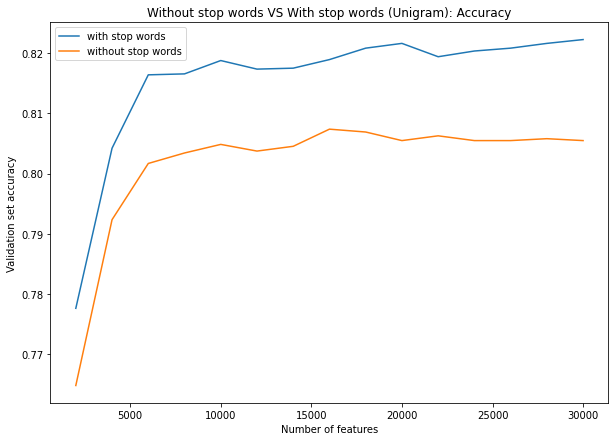

In [ ]:
# Plotting the 2 cases of unigrams against each other (with stop words, without stop words)
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(10,7))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

# NOTE: Results showed that training with stop words produces a better accuracy, so bigrams and trigrams will be processed with stop words

In [ ]:
# Bigrams
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1, 2), classifier=lr)

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 2000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 76.90%
model is 25.95% more accurate than null accuracy
train and test time: 3.11s
--------------------------------------------------------------------------------
Validation result for 4000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 79.19%
model is 28.23% more accurate than null accuracy
train and test time: 3.14s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.17%
model is 29.22% more accurate than null accuracy
train and test time: 3.20s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.77%
model is 29.82% more accurate than null accuracy
train and test time: 3.22s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.37%
model is 30.42% more accurate than null accuracy
train and test time: 3.63s
--------------------------------------------------------------------------------
Validation result for 12000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.72%
model is 30.77% more accurate than null accuracy
train and test time: 4.20s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.69%
model is 30.74% more accurate than null accuracy
train and test time: 4.29s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.90%
model is 30.94% more accurate than null accuracy
train and test time: 4.39s
--------------------------------------------------------------------------------
Validation result for 18000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.96%
model is 31.01% more accurate than null accuracy
train and test time: 4.16s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.79%
model is 30.83% more accurate than null accuracy
train and test time: 4.16s
--------------------------------------------------------------------------------
Validation result for 22000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.94%
model is 30.99% more accurate than null accuracy
train and test time: 4.31s
--------------------------------------------------------------------------------
Validation result for 24000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.02%
model is 31.07% more accurate than null accuracy
train and test time: 4.34s
--------------------------------------------------------------------------------
Validation result for 26000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.12%
model is 31.17% more accurate than null accuracy
train and test time: 4.49s
--------------------------------------------------------------------------------
Validation result for 28000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.23%
model is 31.28% more accurate than null accuracy
train and test time: 4.27s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.31%
model is 31.36% more accurate than null accuracy
train and test time: 4.51s
--------------------------------------------------------------------------------


In [ ]:
# Triagrams
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1, 3), classifier=lr)


RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 2000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 76.85%
model is 25.90% more accurate than null accuracy
train and test time: 5.00s
--------------------------------------------------------------------------------
Validation result for 4000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 79.11%
model is 28.15% more accurate than null accuracy
train and test time: 5.04s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.25%
model is 29.30% more accurate than null accuracy
train and test time: 5.10s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.63%
model is 29.68% more accurate than null accuracy
train and test time: 5.17s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.17%
model is 30.22% more accurate than null accuracy
train and test time: 5.56s
--------------------------------------------------------------------------------
Validation result for 12000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.61%
model is 30.66% more accurate than null accuracy
train and test time: 5.97s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.75%
model is 30.80% more accurate than null accuracy
train and test time: 6.17s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.83%
model is 30.88% more accurate than null accuracy
train and test time: 6.22s
--------------------------------------------------------------------------------
Validation result for 18000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.77%
model is 30.82% more accurate than null accuracy
train and test time: 6.10s
--------------------------------------------------------------------------------
Validation result for 20000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 82.01%
model is 31.06% more accurate than null accuracy
train and test time: 6.08s
--------------------------------------------------------------------------------
Validation result for 22000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.72%
model is 30.77% more accurate than null accuracy
train and test time: 6.11s
--------------------------------------------------------------------------------
Validation result for 24000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.80%
model is 30.85% more accurate than null accuracy
train and test time: 6.15s
--------------------------------------------------------------------------------
Validation result for 26000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.83%
model is 30.88% more accurate than null accuracy
train and test time: 5.94s
--------------------------------------------------------------------------------
Validation result for 28000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.94%
model is 30.99% more accurate than null accuracy
train and test time: 6.01s
--------------------------------------------------------------------------------
Validation result for 30000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.90%
model is 30.94% more accurate than null accuracy
train and test time: 6.33s
--------------------------------------------------------------------------------


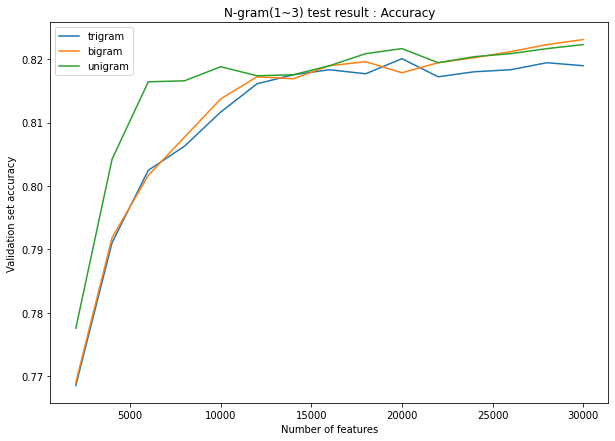

In [ ]:
# Plotting Unigrams Vs Biagrams vs Triagrams on the same graph

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(10,7))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()


In [ ]:
#using Tfidf algorithm to extract features
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,30001,2000)


In [ ]:
#with stopwords in dataset
feature_result_ugt_sw = nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, classifier=lr)


LogisticRegression()


Validation result for 2000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 77.60%
model is 26.65% more accurate than null accuracy
train and test time: 1.60s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.95%
accuracy score: 80.47%
model is 29.52% more accurate than null accuracy
train and test time: 1.33s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.21%
model is 30.26% more accurate than null accuracy
train and test time: 1.66s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.34%
model is 30.39% more accurate than null accuracy
train and test time: 1.67s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.63%
model is 30.68% more accurate than null accuracy
train and test time: 2.10s
--------------------------------------------------------------------------------
Validation result for 12000 features
null accuracy: 50.95%
accuracy score: 81.58%
model is 30.63% more accurate than null accuracy
train and test time: 2.68s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.59%
model is 30.64% more accurate than null accuracy
train and test time: 2.45s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.64%
model is 30.69% more accurate than null accuracy
train and test time: 2.78s
--------------------------------------------------------------------------------
Validation result for 18000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.61%
model is 30.66% more accurate than null accuracy
train and test time: 2.79s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.95%
accuracy score: 81.83%
model is 30.88% more accurate than null accuracy
train and test time: 2.57s
--------------------------------------------------------------------------------
Validation result for 22000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.86%
model is 30.91% more accurate than null accuracy
train and test time: 2.86s
--------------------------------------------------------------------------------
Validation result for 24000 features
null accuracy: 50.95%
accuracy score: 81.85%
model is 30.90% more accurate than null accuracy
train and test time: 2.75s
--------------------------------------------------------------------------------
Validation result for 26000 features
null accuracy: 50.95%
accuracy score: 81.79%
model is 30.83% more accurate than null accuracy
train and test time: 2.68s
--------------------------------------------------------------------------------
Validation result for 28000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.82%
model is 30.87% more accurate than null accuracy
train and test time: 2.79s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.95%
accuracy score: 81.80%
model is 30.85% more accurate than null accuracy
train and test time: 2.98s
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#with out stop words in data set
feature_result_ugt_out_sw = nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words='english', classifier=lr)


LogisticRegression()


Validation result for 2000 features
null accuracy: 50.95%
accuracy score: 76.66%
model is 25.71% more accurate than null accuracy
train and test time: 1.41s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.95%
accuracy score: 79.22%
model is 28.27% more accurate than null accuracy
train and test time: 1.48s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 79.98%
model is 29.03% more accurate than null accuracy
train and test time: 1.63s
--------------------------------------------------------------------------------
Validation result for 8000 features
null accuracy: 50.95%
accuracy score: 80.41%
model is 29.45% more accurate than null accuracy
train and test time: 1.54s
--------------------------------------------------------------------------------
Validation result for 10000 features
null accuracy: 50.95%
accuracy score: 80.60%
model is 29.64% more accurate than null accuracy
train and test time: 1.60s
--------------------------------------------------------------------------------
Validation result for 12000 features
null accuracy: 50.95%
accuracy score: 80.47%
model is 29.52% more accurate than null accuracy
train and test time: 1.85s
--------------------------------------------------------------------------------
Validation result for 14000 features
null accuracy: 50.95%
accuracy score: 80.72%


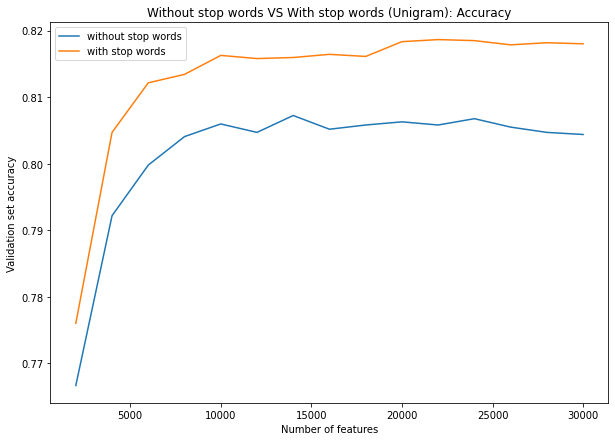

In [ ]:
# unigrams against each other (with stop words, with custom stop words, without stop words) In TfIDF
nfeatures_plot_ugt_out_sw = pd.DataFrame(feature_result_ugt_out_sw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt_sw = pd.DataFrame(feature_result_ugt_sw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(10,7))
plt.plot(nfeatures_plot_ugt_out_sw.nfeatures, nfeatures_plot_ugt_out_sw.validation_accuracy, label='without stop words')
plt.plot(nfeatures_plot_ugt_sw.nfeatures, nfeatures_plot_ugt_sw.validation_accuracy,label='with stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [ ]:
#Bigram with stop words
feature_result_bgt_sw = nfeature_accuracy_checker(vectorizer=tvec,n_features=n_features, ngram_range=(1, 2), classifier=lr)


LogisticRegression()


Validation result for 2000 features
null accuracy: 50.95%
accuracy score: 76.89%
model is 25.94% more accurate than null accuracy
train and test time: 2.77s
--------------------------------------------------------------------------------
Validation result for 4000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 79.30%
model is 28.34% more accurate than null accuracy
train and test time: 3.23s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.50%
model is 29.55% more accurate than null accuracy
train and test time: 3.22s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.77%
model is 29.82% more accurate than null accuracy
train and test time: 3.25s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.06%
model is 30.10% more accurate than null accuracy
train and test time: 3.67s
--------------------------------------------------------------------------------
Validation result for 12000 features
null accuracy: 50.95%
accuracy score: 81.21%
model is 30.26% more accurate than null accuracy
train and test time: 3.77s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.48%
model is 30.53% more accurate than null accuracy
train and test time: 4.28s
--------------------------------------------------------------------------------
Validation result for 16000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.72%
model is 30.77% more accurate than null accuracy
train and test time: 4.55s
--------------------------------------------------------------------------------
Validation result for 18000 features
null accuracy: 50.95%
accuracy score: 81.48%
model is 30.53% more accurate than null accuracy
train and test time: 4.02s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.95%
accuracy score: 81.44%
model is 30.49% more accurate than null accuracy
train and test time: 3.12s
--------------------------------------------------------------------------------
Validation result for 22000 features
null accuracy: 50.95%
accuracy score: 81.29%
model is 30.34% more accurate than null accuracy
train and test time: 3.13s
--------------------------------------------------------------------------------
Validation result for 24000 features
null accuracy: 50.95%
accuracy score: 81.39%

In [ ]:
#Trigram with stop words
feature_result_tgt_sw = nfeature_accuracy_checker(vectorizer=tvec,n_features=n_features, ngram_range=(1, 3), classifier=lr)


LogisticRegression()


Validation result for 2000 features
null accuracy: 50.95%
accuracy score: 76.84%
model is 25.89% more accurate than null accuracy
train and test time: 4.66s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.95%
accuracy score: 79.17%
model is 28.22% more accurate than null accuracy
train and test time: 4.94s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 50.95%
accuracy score: 80.49%
model is 29.53% more accurate than null accuracy
train and test time: 4.94s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 80.66%
model is 29.71% more accurate than null accuracy
train and test time: 5.02s
--------------------------------------------------------------------------------
Validation result for 10000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.12%
model is 30.17% more accurate than null accuracy
train and test time: 5.43s
--------------------------------------------------------------------------------
Validation result for 12000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.37%
model is 30.42% more accurate than null accuracy
train and test time: 5.99s
--------------------------------------------------------------------------------
Validation result for 14000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


null accuracy: 50.95%
accuracy score: 81.21%
model is 30.26% more accurate than null accuracy
train and test time: 5.99s
--------------------------------------------------------------------------------
Validation result for 16000 features
null accuracy: 50.95%
accuracy score: 81.56%
model is 30.61% more accurate than null accuracy
train and test time: 5.32s
--------------------------------------------------------------------------------
Validation result for 18000 features
null accuracy: 50.95%
accuracy score: 81.64%
model is 30.69% more accurate than null accuracy
train and test time: 5.06s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.95%
accuracy score: 81.61%
model is 30.66% more accurate than null accuracy
train and test time: 5.06s
--------------------------------------------------------------------------------
Validation result for 22000 features
null accuracy: 50.95%
accuracy score: 81.45%

In [ ]:
feature_result_tgt_sw_3_3 = nfeature_accuracy_checker(vectorizer=tvec,n_features=n_features, ngram_range=(3, 3), classifier=lr)


LogisticRegression()


Validation result for 2000 features
null accuracy: 50.95%
accuracy score: 55.10%
model is 4.15% more accurate than null accuracy
train and test time: 2.37s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.95%
accuracy score: 56.33%
model is 5.37% more accurate than null accuracy
train and test time: 2.41s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 50.95%
accuracy score: 57.09%
model is 6.14% more accurate than null accuracy
train and test time: 2.37s
--------------------------------------------------------------------------------
Validation result for 8000 features
null accuracy: 50.95%
accuracy score: 57.63%
model is 6.67% more accurate than null accuracy
train and test time: 2.35s
--------------------------------------------------------------------------------
Validation result for 10000 f

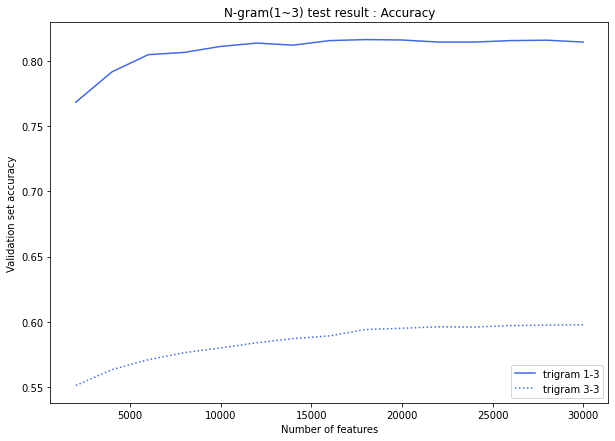

In [ ]:
# Plotting trigram (1,3) features Vs trigram (3,3) features


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt_sw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tgt_3_3 = pd.DataFrame(feature_result_tgt_sw_3_3,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(10,7))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram 1-3',color='royalblue')
plt.plot(nfeatures_plot_tgt_3_3.nfeatures, nfeatures_plot_tgt_3_3.validation_accuracy,label='trigram 3-3',linestyle=':', color='royalblue')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

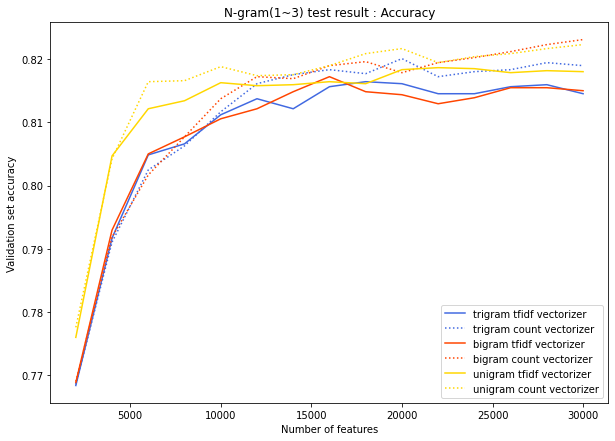

In [ ]:
# Plotting Unigrams Vs Biagrams vs Triagrams on the same graph based on (countvectorizer & tfidf)

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt_sw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt_sw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt_sw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(10,7))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [ ]:
# Trying several classifiers and comparison between them 

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()

#comparator to compare between accuracy of different zipped classifiers

def classifier_comparator(vectorizer=tvec, n_features=None, stop_words=None, ngram_range=None, classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=29311,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression()
null accuracy: 50.95%
accuracy score: 81.53%
model is 30.58% more accurate than null accuracy
train and test time: 4.96s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC()
null accuracy: 50.95%
accuracy score: 81.56%
model is 30.61% more accurate than null accuracy
train and test time: 4.42s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', LinearSVC())])
null accuracy: 50.95%
accuracy score: 81.58%
model is 30.63% more accurate than null accuracy
train and test time: 5.86s
--------------------------------------------------------------------------------

In [ ]:
#use top 5 of classifiers and use VotingClassifier with voting hard
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = AdaBoostClassifier()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')
checker_pipeline = Pipeline([
              ('vectorizer', TfidfVectorizer(max_features=29311,ngram_range=(1, 3))),
              ('classifier', eclf)
])
print ("Validation result for {}".format('Ensemble'))
print (eclf)
accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)


Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', LinearSVC()),
                             ('mnb', AdaBoostClassifier()),
                             ('rcs', RidgeClassifier()),
                             ('pac', PassiveAggressiveClassifier())])
null accuracy: 50.95%
accuracy score: 81.67%
model is 30.72% more accurate than null accuracy
train and test time: 11.63s
--------------------------------------------------------------------------------


(0.8167406467977172, 11.631664991378784)

In [ ]:
#use top 5 of classifiers and use VotingClassifier with voting soft
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = MultinomialNB()
clf3 = AdaBoostClassifier()
clf4 = BernoulliNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4)], voting='soft')
checker_pipeline = Pipeline([
              ('vectorizer', TfidfVectorizer(max_features=29311,ngram_range=(1, 3))),
              ('classifier', eclf)
])
print ("Validation result for {}".format('Ensemble'))
print (eclf)
accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)


Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', MultinomialNB()),
                             ('mnb', AdaBoostClassifier()),
                             ('rcs', BernoulliNB())],
                 voting='soft')
null accuracy: 50.95%
accuracy score: 80.45%
model is 29.50% more accurate than null accuracy
train and test time: 12.31s
--------------------------------------------------------------------------------


(0.8045339251743817, 12.305183172225952)